<a href="https://colab.research.google.com/github/gurovic/MLCourse/blob/main/130_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Метод опорных векторов (SVM)

## 🟢 Базовый уровень: Линейное разделение

### 1.1 Суть метода SVM
SVM находит **оптимальную разделяющую линию** между классами. Главные особенности:
- **Максимальный запас (margin):** Линия проводится так, чтобы расстояние до ближайших точек обоих классов было максимальным.
- **Опора на ключевые точки:** Разделяющая линия определяется только самыми важными точками данных — **опорными векторами**. Это означает, что граница строится исключительно на основе точек, расположенных ближе всего к границе разделения. Если убрать все остальные точки, граница останется прежней.

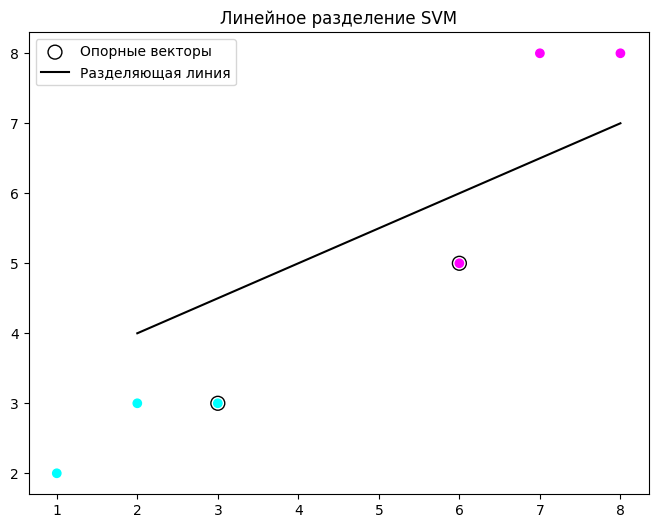

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Создаем простые линейно разделимые данные
X = np.array([[1,2], [2,3], [3,3], [6,5], [7,8], [8,8]])
y = np.array([0, 0, 0, 1, 1, 1])

# Обучаем модель
model = SVC(kernel='linear', C=1)
model.fit(X, y)

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='cool')
# Выделяем опорные векторы
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1],
            s=100, facecolors='none', edgecolors='k', label='Опорные векторы')
plt.plot([2, 8], [4, 7], 'k-', label='Разделяющая линия')
plt.legend()
plt.title("Линейное разделение SVM")
plt.show()

### 1.3 Важность параметра С
**Параметр C** определяет баланс между двумя целями:
1. Максимально увеличить запас (ширину "буферной зоны" между классами)
2. Минимизировать количество ошибок классификации

- **Маленькое С (0.1):**
  - Приоритет: максимально широкий запас
  - Допускаются ошибки классификации
  - Хорошо для данных с шумом
  
- **Большое С (10):**
  - Приоритет: точная классификация всех точек
  - Узкий запас
  - Риск переобучения

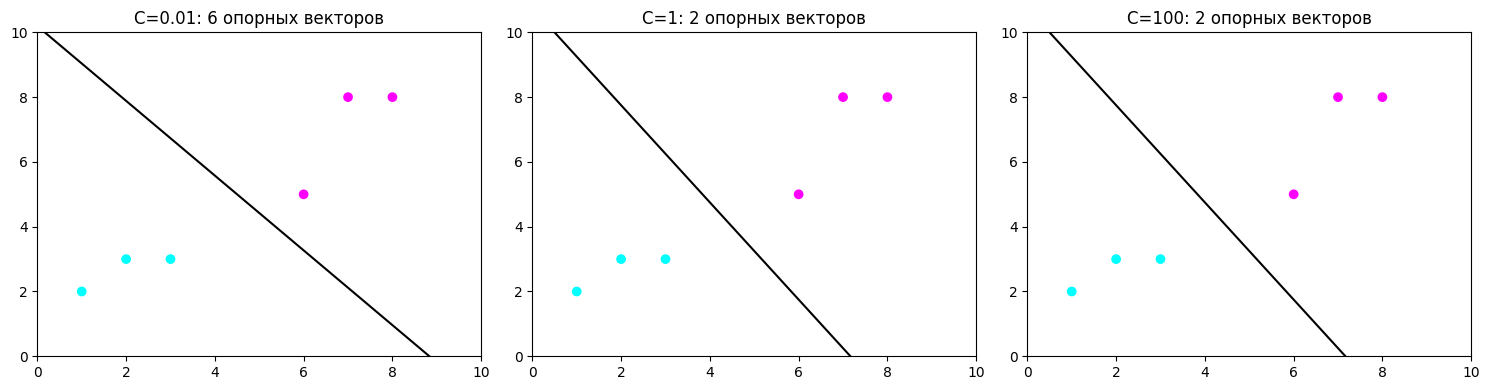

In [2]:
# Примеры с разными С
C_values = [0.01, 1, 100]
plt.figure(figsize=(15, 4))

for i, C in enumerate(C_values):
    model = SVC(kernel='linear', C=C).fit(X, y)

    # Коэффициенты разделяющей линии
    w = model.coef_[0]
    b = model.intercept_[0]

    # Точки для построения линии
    x_points = np.linspace(0, 10, 100)
    y_points = -(w[0]/w[1]) * x_points - b/w[1]

    plt.subplot(1, 3, i+1)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='cool')
    plt.plot(x_points, y_points, 'k-')
    plt.title(f"C={C}: {len(model.support_vectors_)} опорных векторов")
    plt.xlim(0, 10)
    plt.ylim(0, 10)

plt.tight_layout()
plt.show()

## 🟡 Продвинутый уровень: Сложные данные

### 2.1 Данные "Луны" (Moons)
Когда классы нельзя разделить прямой линией:

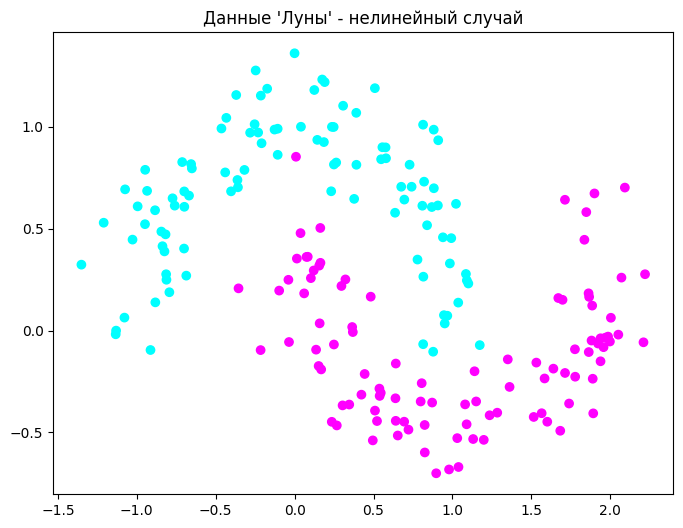

In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.15, random_state=42)
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='cool')
plt.title("Данные 'Луны' - нелинейный случай")
plt.show()

### 2.2 Решение с помощью RBF-ядра
**RBF (Radial Basis Function) ядро** решает проблему нелинейности, преобразуя данные в более высокоразмерное пространство. Оно работает так:
1. Вокруг каждой точки создается "колоколообразный холм"
2. Чем ближе другие точки к центру, тем выше значение функции
3. SVM находит разделяющую поверхность в этом новом пространстве

**Параметр gamma** контролирует ширину этих "холмов":
- **Маленькое gamma (0.01):** Широкие холмы, сглаженная граница
- **Большое gamma (10):** Узкие холмы, сложная граница (риск переобучения)

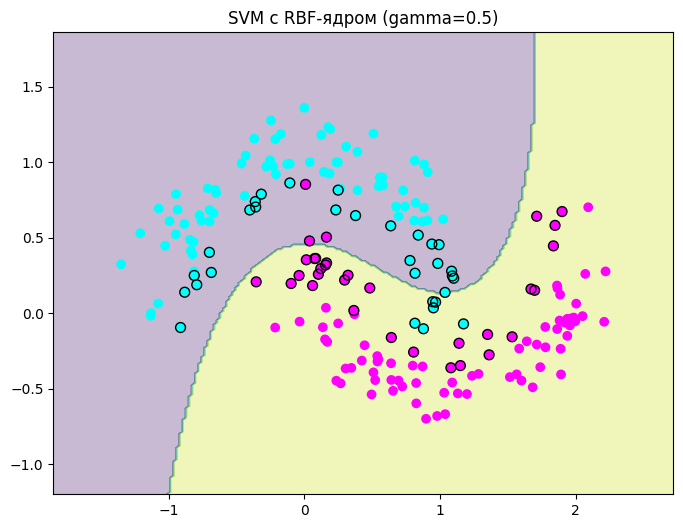

In [4]:
model = SVC(kernel='rbf', gamma=0.5, C=1)
model.fit(X, y)

# Визуализация
x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, cmap='cool')
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1],
            s=50, facecolors='none', edgecolors='k')
plt.title("SVM с RBF-ядром (gamma=0.5)")
plt.show()

### 2.3 Подбираем gamma и C
Экспериментируем с разными значениями gamma:

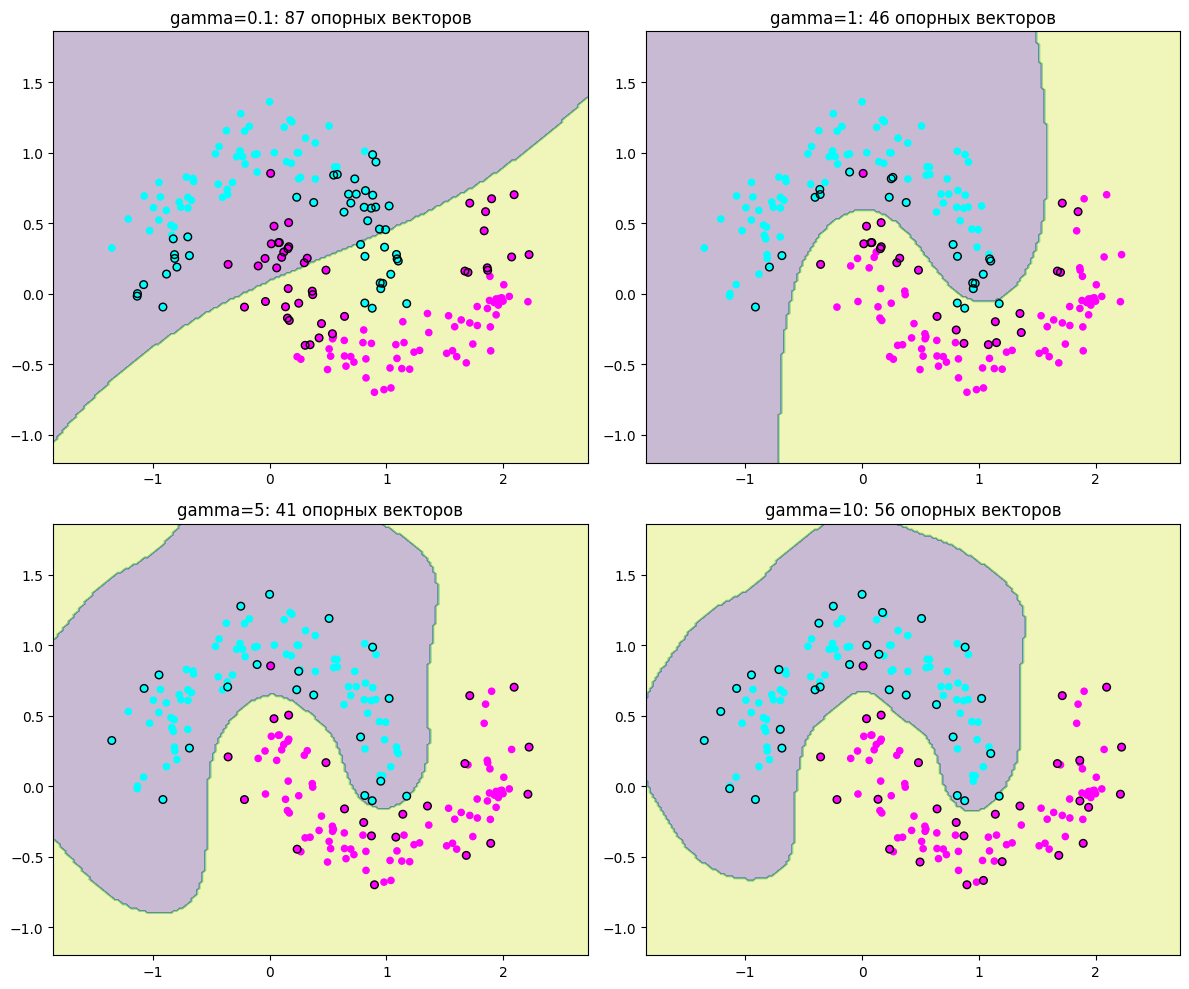

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
gammas = [0.1, 1, 5, 10]

for i, gamma in enumerate(gammas):
    model = SVC(kernel='rbf', gamma=gamma, C=1).fit(X, y)

    # Предсказания для сетки
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    ax = axes[i//2, i%2]
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:,0], X[:,1], c=y, cmap='cool', s=20)
    ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1],
               s=30, facecolors='none', edgecolors='k')
    ax.set_title(f"gamma={gamma}: {len(model.support_vectors_)} опорных векторов")

plt.tight_layout()
plt.show()

## 🔴 Экспертный уровень: Специальные техники

### 3.1 Данные "Круги" (Concentric circles)
Еще более сложный случай, где один класс окружает другой:

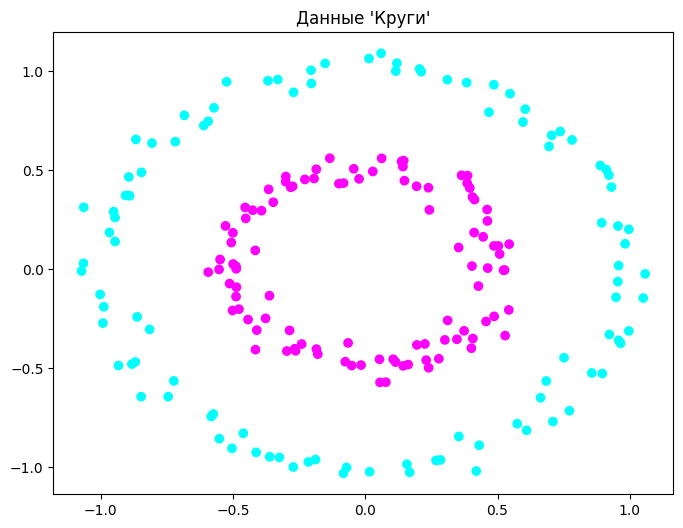

In [6]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=200, noise=0.05, factor=0.5, random_state=42)
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='cool')
plt.title("Данные 'Круги'")
plt.show()

### 3.2 Полиномиальное ядро
Альтернатива RBF - ядро полинома степени `d`:

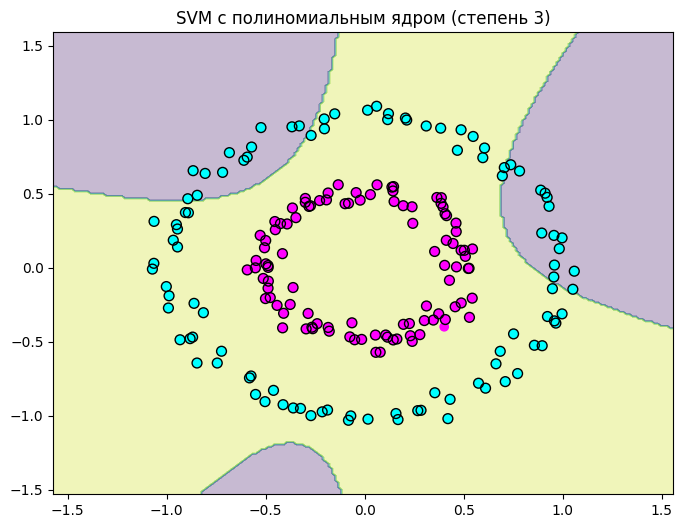

In [7]:
model = SVC(kernel='poly', degree=3, C=10)  # 3-я степень
model.fit(X, y)

# Визуализация
x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, cmap='cool')
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1],
            s=50, facecolors='none', edgecolors='k')
plt.title("SVM с полиномиальным ядром (степень 3)")
plt.show()

### 3.3 SVM для больших данных
Обычный SVM может быть медленным для больших наборов данных (>10,000 примеров). Решение — **SVM со стохастическим градиентом (SGD)**:

In [8]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# Создаем большой датасет "лун"
X_big, y_big = make_moons(n_samples=10000, noise=0.2)

# Масштабирование данных
scaler = StandardScaler()
X_big_scaled = scaler.fit_transform(X_big)

# Быстрый линейный SVM
sgd_svm = SGDClassifier(loss='hinge', alpha=0.01, max_iter=1000, random_state=42)

import time
start_time = time.time()
sgd_svm.fit(X_big_scaled, y_big)
training_time = time.time() - start_time

accuracy = sgd_svm.score(X_big_scaled, y_big)
print(f"Точность SGD-SVM: {accuracy:.4f}")
print(f"Время обучения: {training_time:.2f} секунд")

Точность SGD-SVM: 0.8687
Время обучения: 0.01 секунд


## 📊 Чеклист по уровням

| Уровень | Навыки |
|---------|--------|
| 🟢 | Понимание опорных векторов, влияние C |
| 🟡 | Применение RBF-ядра, выбор gamma |
| 🔴 | Работа с полиномиальными ядрами, оптимизация скорости |

## ⚠️ Типичные ошибки
1. **Забывать масштабировать данные**  
   SVM чувствителен к масштабу: `from sklearn.preprocessing import StandardScaler`

2. **Использовать линейное ядро для нелинейных данных**  
   Всегда начинайте с RBF для сложных случаев.

3. **Игнорировать подбор gamma**  
   Слишком высокое gamma → переобучение (граница проходит через каждую точку).

4. **Не смотреть на опорные векторы**  
   Их количество показывает сложность модели:

In [9]:
model = SVC(kernel='rbf').fit(X, y)
print("Число опорных векторов:", len(model.support_vectors_))

Число опорных векторов: 32


## 🚀 Полезные советы
1. **Автоподбор параметров:**

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}
grid = GridSearchCV(SVC(), param_grid, cv=3)
grid.fit(X, y)
print("Лучшие параметры:", grid.best_params_)

Лучшие параметры: {'C': 0.1, 'gamma': 1}


2. **Как выбрать ядро?**
- Линейное: >10,000 признаков или когда данные линейно разделимы
- RBF: по умолчанию для большинства случаев
- Полиномиальное: когда знаете, что зависимость полиномиальная

3. **Интерпретация опорных векторов:**
- Точки, которые сложно классифицировать
- Граница зависит только от них
- Удаление других точек не изменит модель

## 📌 Практические задания

### 🟢 Базовый уровень
1. Для точек:  
   Класс 0: [1,1], [1,2], [2,1]  
   Класс 1: [2,2], [3,2], [2,3]  
   Обучите SVM. Найдите опорные векторы и визуализируйте.

### 🟡 Продвинутый уровень
1. Для данных "Луны" с noise=0.2 подберите C и gamma так, чтобы точность на тестовом наборе была >0.9.

### 🔴 Экспертный уровень
1. Для данных "Круги" сравните RBF и полиномиальное ядро (степени 2,3,4). Какое лучше?
2. Реализуйте SGD-SVM для датасета размером 50,000 точек.

### Решение задания 🟢

Опорные векторы:
 [[1. 2.]
 [2. 1.]
 [2. 2.]
 [3. 2.]]


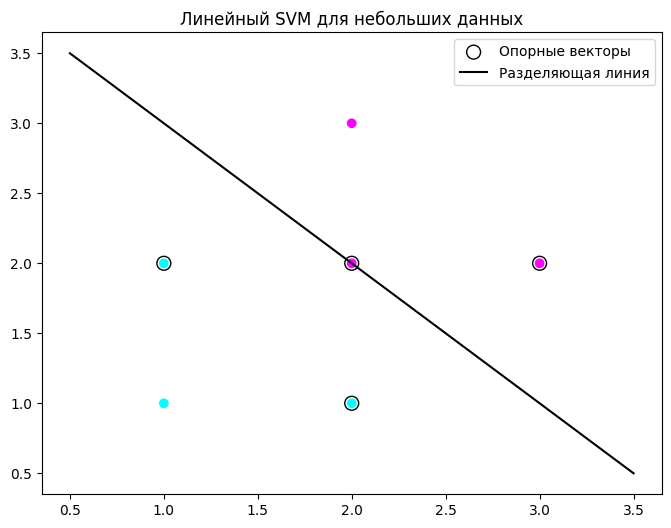

In [11]:
# Решение задания 🟢
X = np.array([[1,1], [1,2], [2,1], [2,2], [3,2], [2,3]])
y = np.array([0, 0, 0, 1, 1, 1])
model = SVC(kernel='linear').fit(X, y)

print("Опорные векторы:\n", model.support_vectors_)

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='cool')
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1],
            s=100, facecolors='none', edgecolors='k', label='Опорные векторы')

# Разделяющая линия
w = model.coef_[0]
b = model.intercept_[0]
x_points = np.linspace(0.5, 3.5, 100)
y_points = -(w[0]/w[1]) * x_points - b/w[1]
plt.plot(x_points, y_points, 'k-', label='Разделяющая линия')

plt.title("Линейный SVM для небольших данных")
plt.legend()
plt.show()

## 📌 Итоги
Ключевые идеи:
1. **Опорные векторы** — сердце SVM. Модель строится только на них.
2. **Параметр C** — регуляризация. Контролирует компромисс между запасом и ошибками.
3. **RBF-ядро** — мощный инструмент для нелинейных задач.
4. **Gamma** в RBF — настраивает "гибкость" границы.

Применяйте SVM когда:
- Мало данных (менее 10,000 образцов)
- Нужна высокая точность на сложных границах
- Важно понимать ключевые точки (опорные векторы)

> "SVM — как опытный картограф: находит четкие границы даже в самых сложных ландшафтах данных"